# Airline Passenger Satisfaction dataset description
# phase 1

## The goal of collecting this dataset
Understanding and improving airline passenger satisfaction by analyzing the data is crucial for an airline to attract and retain customers, build brand loyalty, and differentiate itself in a competitive market by addressing these challenges and listing the issues found to brainstorm solutions, then ordering them by its effect on the airline to tackle; which would enhance the overall travel experience and drive long-term success.
## Dataset source
The source: [click here](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction/data) 


## Classification for  airline passengers Survey Prediction:
Involves using survey data attributes to predict customer satisfaction levels. The goal is to categorize respondents into predefined satisfaction categories: satisfied, neutral or dissatisfied. This classification aids in understanding customer sentiment and guiding decision-making to improve overall satisfaction.

## Clustering for airline passengers Survey Prediction: 
Clustering customer survey responses involves grouping similar data points based on common characteristics to establish distinct clusters. Different techniques will be employed to identify the optimal number of clusters that align with our dataset. Subsequently, evaluation methods will be applied to measure the efficiency of these clusters in effectively categorizing survey responses based on their intrinsic features, facilitating insightful predictions and analysis for future decisions.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
dataset=pd.read_csv('../Dataset/Original_dataset.csv')
preprocess=pd.read_csv('../Dataset/Processed_dataset.csv')
df=pd.DataFrame(dataset) 
dfp=pd.DataFrame(preprocess) 

## General information of the dataset:

Number of Attributes: 24

Number of Object: 500

Class Lable: Satisfaction


1- ID: Unique identifier for the passenger 

2- Gender: Gender of the passengers (Female, Male)

3- Customer Type: The customer type (Loyal customer, disloyal customer)

4- Age: The actual age of the passengers

5- Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)"

6- Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

7- Flight distance: The flight distance of this journey

8- Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

9- Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

10- Ease of Online booking: Satisfaction level of online booking

11- Gate location: Satisfaction level of Gate location

12- Food and drink: Satisfaction level of Food and drink

13- Online boarding: Satisfaction level of online boarding

14- Seat comfort: Satisfaction level of Seat comfort

15- Inflight entertainment: Satisfaction level of inflight entertainment

16- On-board service: Satisfaction level of On-board service

17- Leg room service: Satisfaction level of Leg room service

18- Baggage handling: Satisfaction level of baggage handling

19- Check-in service: Satisfaction level of Check-in service

20- Inflight service: Satisfaction level of inflight service

21- Cleanliness: Satisfaction level of Cleanliness

22- Departure Delay in Minutes: Minutes delayed when departure

23- Arrival Delay in Minutes: Minutes delayed when Arrival

24- Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [4]:
table = """
| Attribute Name                     | Data Type | Possible Values                                            |
|------------------------------------|-----------|------------------------------------------------------------|
| id                                 | Integer   | Numeric IDs                                                |
| Gender                             | String    | Male, Female                                               |
| Customer Type                      | String    | Loyal Customer, disloyal Customer                          |
| Age                                | Integer   | Numeric ages                                               |
| Type of Travel                     | String    | Business travel, Personal Travel                           |
| Class                              | String    | Eco, Business, Eco Plus                                    |
| Flight Distance                    | Integer   | Numeric distances  31 to 4983                              |
| Inflight wifi service              | Integer   | 0 to 5                                                     |
| Departure/Arrival time convenient  | Integer   | 0 to 5                                                     |
| Ease of Online booking             | Integer   | 0 to 5                                                     |
| Gate location                      | Integer   | 0 to 5                                                     |
| Food and drink                     | Integer   | 0 to 5                                                     |
| Online boarding                    | Integer   | 0 to 5                                                     |
| Seat comfort                       | Integer   | 0 to 5                                                     |
| Inflight entertainment             | Integer   | 0 to 5                                                     |
| On-board service                   | Integer   | 0 to 5                                                     |
| Leg room service                   | Integer   | 0 to 5                                                     |
| Baggage handling                   | Integer   | 0 to 5                                                     |
| Checkin service                    | Integer   | 0 to 5                                                     |
| Inflight service                   | Integer   | 0 to 5                                                     |
| Cleanliness                        | Integer   | 0 to 5                                                     |
| Departure Delay in Minutes         | Integer   | Numeric minutes 0-1592                                     |
| Arrival Delay in Minutes           | Integer   | Numeric minutes 0-158000                                   |
| satisfaction                       | String    | satisfied, neutral or dissatisfied                         |
"""

print(table)



| Attribute Name                     | Data Type | Possible Values                                            |
|------------------------------------|-----------|------------------------------------------------------------|
| id                                 | Integer   | Numeric IDs                                                |
| Gender                             | String    | Male, Female                                               |
| Customer Type                      | String    | Loyal Customer, disloyal Customer                          |
| Age                                | Integer   | Numeric ages                                               |
| Type of Travel                     | String    | Business travel, Personal Travel                           |
| Class                              | String    | Eco, Business, Eco Plus                                    |
| Flight Distance                    | Integer   | Numeric distances  31 to 4983                       

# phase 2

## Summary of the dataset:

### Raw dataset:

In [5]:
display(df)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1770,Male,disloyal Customer,20,Business travel,Business,408,5,0,5,...,3,3,5,5,3,4,3,0,0,satisfied
496,70400,Female,Loyal Customer,44,Business travel,Business,1162,4,4,4,...,4,4,4,4,2,4,2,0,4,satisfied
497,15078,Female,Loyal Customer,33,Business travel,Business,239,1,1,1,...,4,4,4,4,4,4,1,0,0,satisfied
498,4927,Female,Loyal Customer,60,Business travel,Business,1020,4,4,4,...,5,5,5,5,4,5,5,5,0,satisfied


a glimpse into the structure and content of the airline customer travel experience dataset.


In [6]:
duplicates_sum = df.duplicated().sum()
print(duplicates_sum)

0


this code confirms that the dataset has no rows that are identical copies of other rows based on all columns.


### Missing values:

In [7]:
##checking null values
missing_values = df.isna().sum()
print(missing_values)

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64


this code confirms that the dataset is well-maintained and doesn't have any missing data across any of its columns.


### The following is graphs of some of our attribute to understand it more:

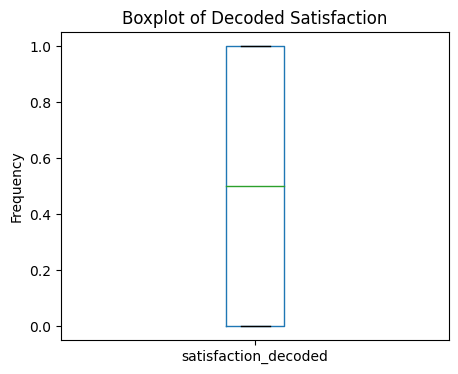

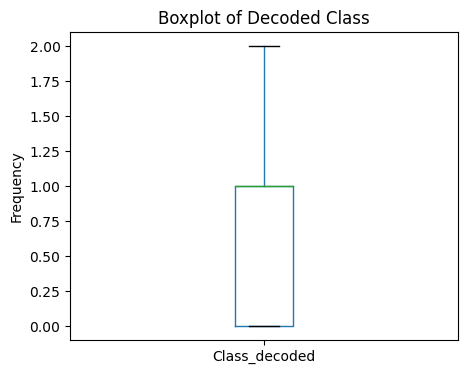

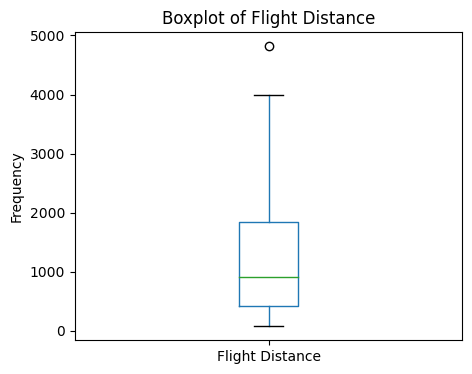

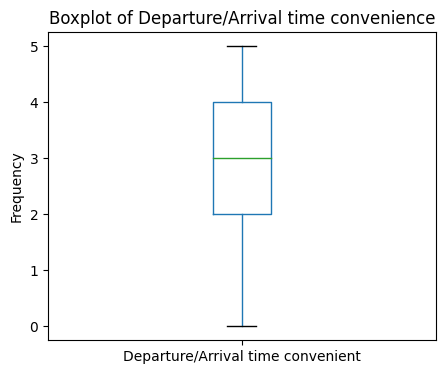

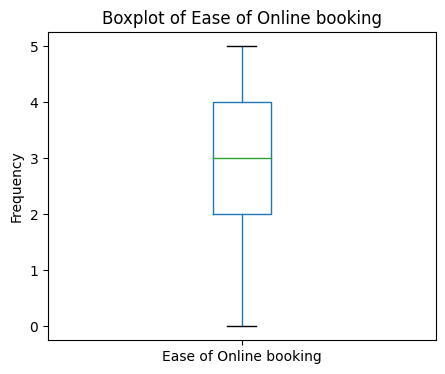

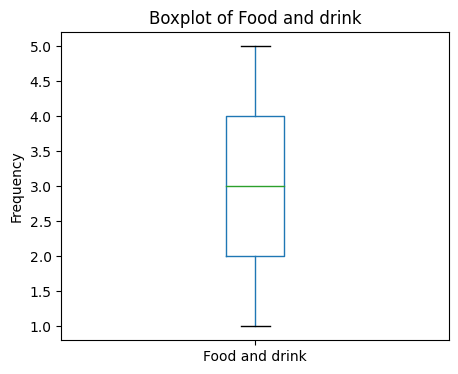

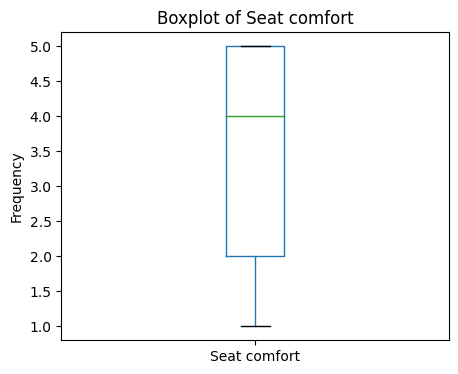

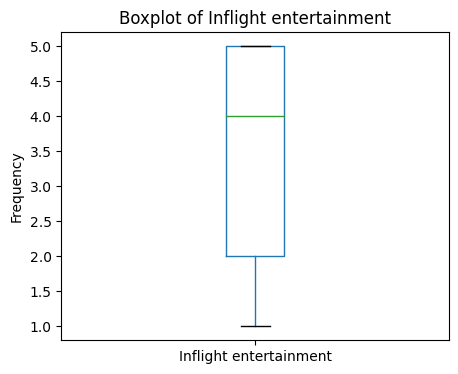

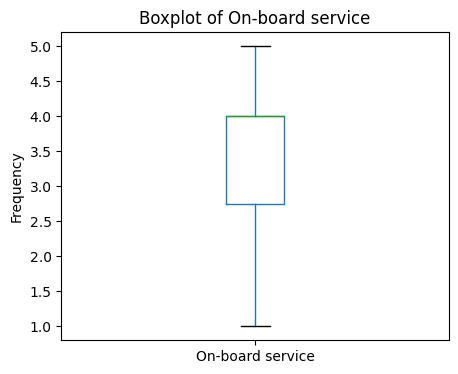

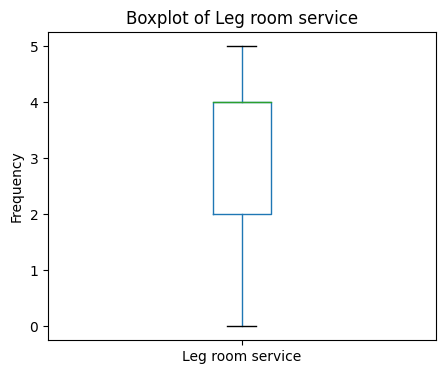

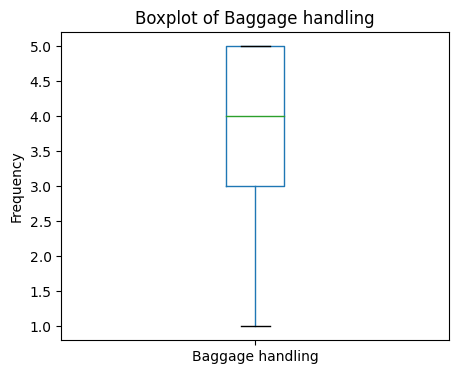

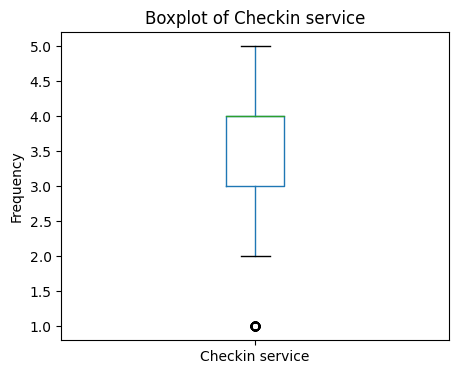

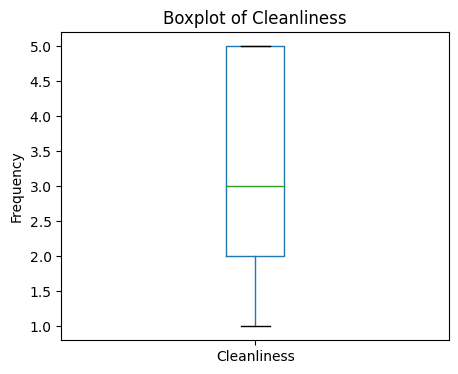

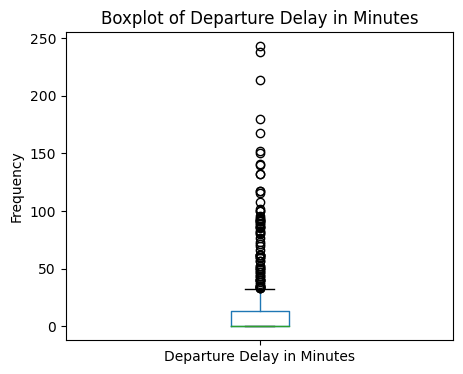

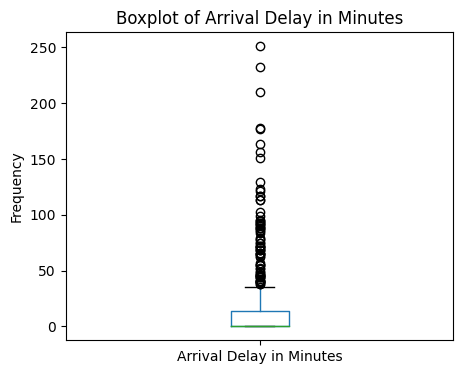

In [8]:
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'satisfaction' column
df['satisfaction_decoded'] = label_encoder.fit_transform(df['satisfaction'])

# Plot boxplot of decoded satisfaction column
plt.figure(figsize=(5, 4))
df.boxplot(column='satisfaction_decoded', figsize=(5, 4), grid=False)
plt.title('Boxplot of Decoded Satisfaction')
plt.ylabel('Frequency')
plt.show()

# Fit and transform 'Class' column
df['Class_decoded'] = label_encoder.fit_transform(df['Class'])

# Plot boxplot of decoded 'Class' column
plt.figure(figsize=(5, 4))
df.boxplot(column='Class_decoded', figsize=(5, 4), grid=False)
plt.title('Boxplot of Decoded Class')
plt.ylabel('Frequency')
plt.show()


# Boxplot of Flight Distance
plt.figure(figsize=(5, 4))
df.boxplot(column='Flight Distance', figsize=(5, 4), grid=False)
plt.title('Boxplot of Flight Distance')
plt.ylabel('Frequency')
plt.show()


# Boxplot of Departure/Arrival time convenient
plt.figure(figsize=(5, 4))
df.boxplot(column='Departure/Arrival time convenient', figsize=(8, 6), grid=False)
plt.title('Boxplot of Departure/Arrival time convenience')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Ease of Online booking
plt.figure(figsize=(5, 4))
df.boxplot(column='Ease of Online booking', figsize=(5, 4), grid=False)
plt.title('Boxplot of Ease of Online booking')
plt.ylabel('Frequency')
plt.show()


# Boxplot of Food and drink
plt.figure(figsize=(5, 4))
df.boxplot(column='Food and drink', figsize=(5, 4), grid=False)
plt.title('Boxplot of Food and drink')
plt.ylabel('Frequency')
plt.show()


# Boxplot of Seat comfort
plt.figure(figsize=(5, 4))
df.boxplot(column='Seat comfort', figsize=(5, 4), grid=False)
plt.title('Boxplot of Seat comfort')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Inflight entertainment
plt.figure(figsize=(5, 4))
df.boxplot(column='Inflight entertainment', figsize=(5, 4), grid=False)
plt.title('Boxplot of Inflight entertainment')
plt.ylabel('Frequency')
plt.show()

# Boxplot of On-board service
plt.figure(figsize=(5, 4))
df.boxplot(column='On-board service', figsize=(5, 4), grid=False)
plt.title('Boxplot of On-board service')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Leg room service
plt.figure(figsize=(5, 4))
df.boxplot(column='Leg room service', figsize=(5, 4), grid=False)
plt.title('Boxplot of Leg room service')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Baggage handling
plt.figure(figsize=(5, 4))
df.boxplot(column='Baggage handling', figsize=(5, 4), grid=False)
plt.title('Boxplot of Baggage handling')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Checkin service
plt.figure(figsize=(5, 4))
df.boxplot(column='Checkin service', figsize=(5, 4), grid=False)
plt.title('Boxplot of Checkin service')
plt.ylabel('Frequency')
plt.show()


# Boxplot of Cleanliness
plt.figure(figsize=(5, 4))
df.boxplot(column='Cleanliness', figsize=(5, 4), grid=False)
plt.title('Boxplot of Cleanliness')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Departure Delay in Minutes
plt.figure(figsize=(5, 4))
df.boxplot(column='Departure Delay in Minutes', figsize=(5, 4), grid=False)
plt.title('Boxplot of Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Arrival Delay in Minutes
plt.figure(figsize=(5, 4))
df.boxplot(column='Arrival Delay in Minutes', figsize=(5, 4), grid=False)
plt.title('Boxplot of Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

here we shows boxplot of our attribute we can know from this graph what is the median and max ,min of each boxplot,and there 
is a lot of outliers must be removed in preprocessing stage

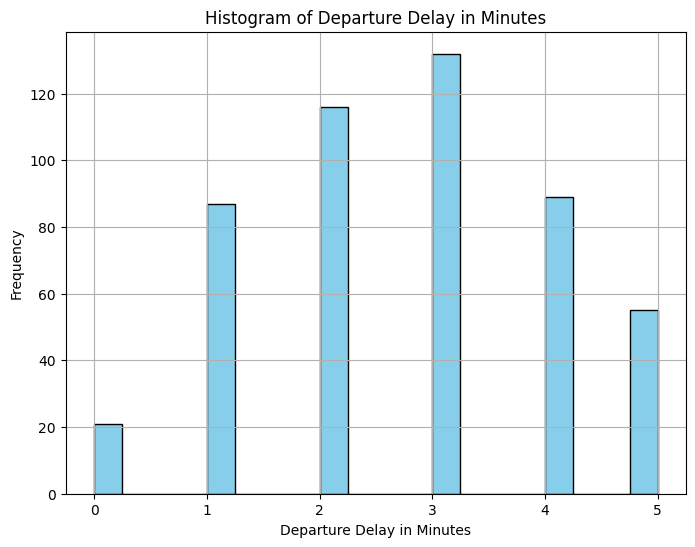

In [9]:
# Plot histogram for 'Departure Delay in Minutes'
plt.figure(figsize=(8, 6))
plt.hist(df['Ease of Online booking'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Departure Delay in Minutes')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

The average rating of travelers from 0 to 5 for ease of booking is 2 for fewer than 100 travelers and 3 for more than 100 travelers. This means that more than 200 have an normal rating, not excellent.

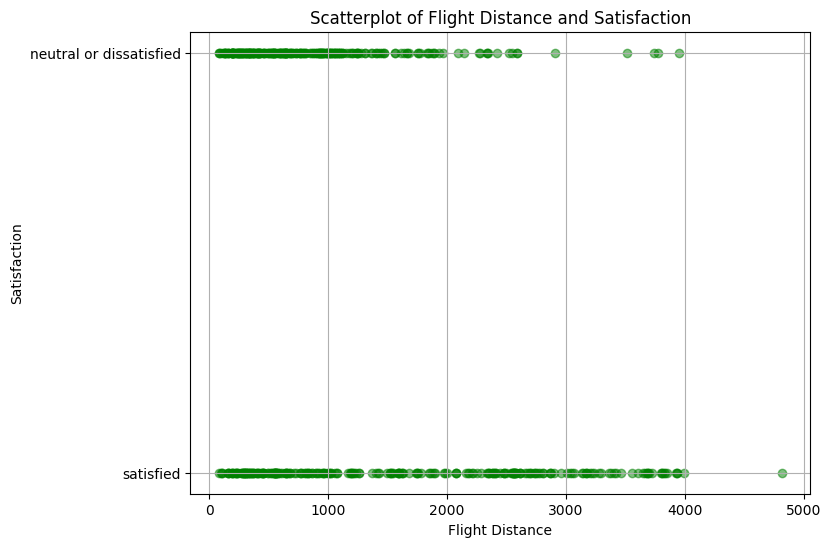

In [10]:
# Plot scatterplot for 'Flight Distance' and 'satisfaction'
plt.figure(figsize=(8, 6))
plt.scatter(df['Flight Distance'], df['satisfaction'], color='green', alpha=0.5)
plt.title('Scatterplot of Flight Distance and Satisfaction')
plt.xlabel('Flight Distance')
plt.ylabel('Satisfaction')
plt.grid(True)
plt.show()

here in scatterplot provides a visual representation of the data points, for the correlation between flight distance and satisfaction.we can see that they share to different options between 0-2000 of distance and We almost see that no matter how long the distance is, there are still satisfied travelers, which indicates their comfort.

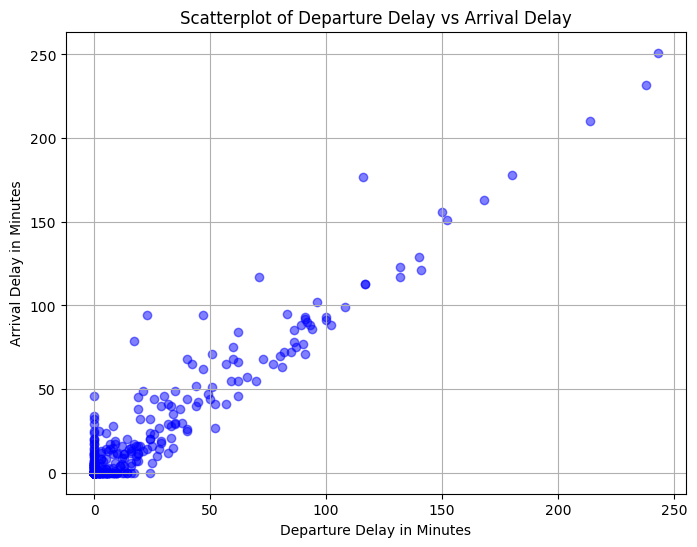

In [11]:
# Plot scatterplot for 'Departure Delay in Minutes' and 'Arrival Delay in Minutes'
plt.figure(figsize=(8, 6))
plt.scatter(df['Departure Delay in Minutes'], df['Arrival Delay in Minutes'], color='blue', alpha=0.5)
plt.title('Scatterplot of Departure Delay vs Arrival Delay')
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Arrival Delay in Minutes')
plt.grid(True)
plt.show()

We note that there is a strong linear relationship between the variables. This means that as one variable increases, the other tends to constantly increase or decrease, and there is a concentration of data dots within that range between 0-50 that means A high density of dots within this range might indicate that most flights experience delays within this time frame during normal operations, and there are some outliers.

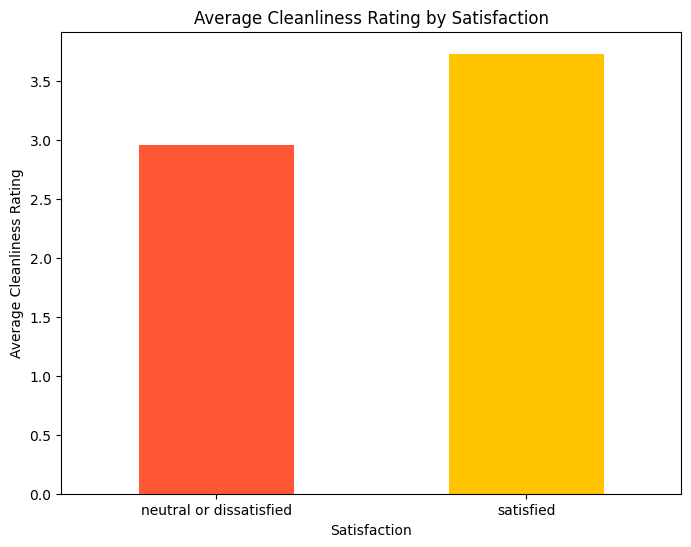

In [12]:
# Group by satisfaction and calculate the mean Cleanliness rating for each group
cleanliness_means = df.groupby('satisfaction')['Cleanliness'].mean()

# Define warm colors
warm_colors = ['#FF5733', '#FFC300']

# Create bar plot with warm colors
plt.figure(figsize=(8, 6))
cleanliness_means.plot(kind='bar', color=warm_colors)
plt.title('Average Cleanliness Rating by Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Average Cleanliness Rating')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

In this bar plot we see that most passengers are satisfied with cleanliness, although the rate of those who are neutral or dissatisfied is close to those who are satisfied

## Statistical summary:

### Encoding:

In [13]:
label_encoder = LabelEncoder()
dfp['Gender'] = label_encoder.fit_transform(dfp['Gender']) ## 0=female,1=male 
dfp['Customer Type'] = label_encoder.fit_transform(dfp['Customer Type']) ##0=Loyal Customer, 1=disloyal Customer
dfp['Type of Travel'] = label_encoder.fit_transform(dfp['Type of Travel'])  #0=Business travel, 1=Personal Travel
dfp['Class'] = label_encoder.fit_transform(dfp['Class']) # 0=Business, 1=eco
dfp['satisfaction'] = label_encoder.fit_transform(dfp['satisfaction']) # 0=neutral or dissatisfied, 1=satisfied
display(dfp)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,19556,0,0,50-60,0,1,0.017511,4,3,4,...,4,3,5,5,5,5,2,5,0.205761,1
1,90035,0,0,30-40,0,0,0.587764,1,3,1,...,4,5,4,4,4,4,3,5,0.000000,1
2,12360,1,1,<20,0,1,0.024262,0,2,4,...,2,2,2,4,1,3,2,2,0.000000,0
3,77959,1,0,40-50,0,0,0.696203,0,0,2,...,4,4,1,1,1,1,3,4,0.000000,1
4,36875,0,0,40-50,0,1,0.233122,3,4,3,...,1,2,2,2,2,2,4,4,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1770,1,1,<20,0,0,0.069831,0,5,2,...,5,3,3,3,5,5,3,3,0.000000,1
496,70400,0,0,40-50,0,0,0.228903,4,4,4,...,1,2,4,4,4,4,2,2,0.000000,1
497,15078,0,0,30-40,0,0,0.034177,1,1,1,...,5,1,4,4,4,4,4,1,0.000000,1
498,4927,0,0,50-60,0,0,0.198945,4,4,4,...,4,4,5,5,5,5,4,5,0.020576,1


Encoding categorical variables is essential for statistical analysis as it enables the inclusion of qualitative data in quantitative models. By converting categorical data into numerical representations. The categorical columns are 'Gender', 'Customer Type', 'Type of Travel', 'Class', and 'satisfaction' have bean encoded above

In [14]:
selected_attributes = ['Class','Flight Distance','Departure/Arrival time convenient', 'Ease of Online booking',
                       'Food and drink', 'Seat comfort','Inflight entertainment', 'On-board service', 'Baggage handling', 'Checkin service',  
                       'Cleanliness','Departure Delay in Minutes', 'Arrival Delay in Minutes'] 

# Calculate descriptive statistics for selected attributes
statistics = df[selected_attributes].describe()
display(statistics)

,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Food and drink,Seat comfort,Inflight entertainment,On-board service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,500.000000,500.000000,500.00000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1243.404000,3.020000,2.69200,3.268000,3.48200,3.422000,3.404000,3.696000,3.382000,3.342000,15.372000,15.900000
std,1032.374319,1.511347,1.35381,1.295969,1.33463,1.321897,1.308514,1.156832,1.251883,1.329877,33.824041,34.158331
min,77.000000,0.000000,0.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,414.000000,2.000000,2.00000,2.000000,2.00000,2.000000,2.750000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,912.500000,3.000000,3.00000,3.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000
75%,1849.250000,4.000000,4.00000,4.000000,5.00000,5.000000,4.000000,5.000000,4.000000,5.000000,13.000000,14.000000
max,4817.000000,5.000000,5.00000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,243.000000,251.000000


The dataset analysis indicates varied airline passenger satisfaction, covering a wide range of travel distances from 77 to 4,817 miles and showing an average flight distance of 1,243.4 miles. Average satisfaction scores for scheduling and service quality attributes like online booking, food quality, seat comfort, and more range from 2.69 to 3.69, with seat comfort and baggage handling noted as strengths. However, the data also reveals significant variability in experiences and operational efficiency, with departure and arrival delays averaging 15.37 and 15.9 minutes, respectively. This variability suggests room for improvement in online booking and delay management to enhance passenger satisfaction.

### Preprocessing:

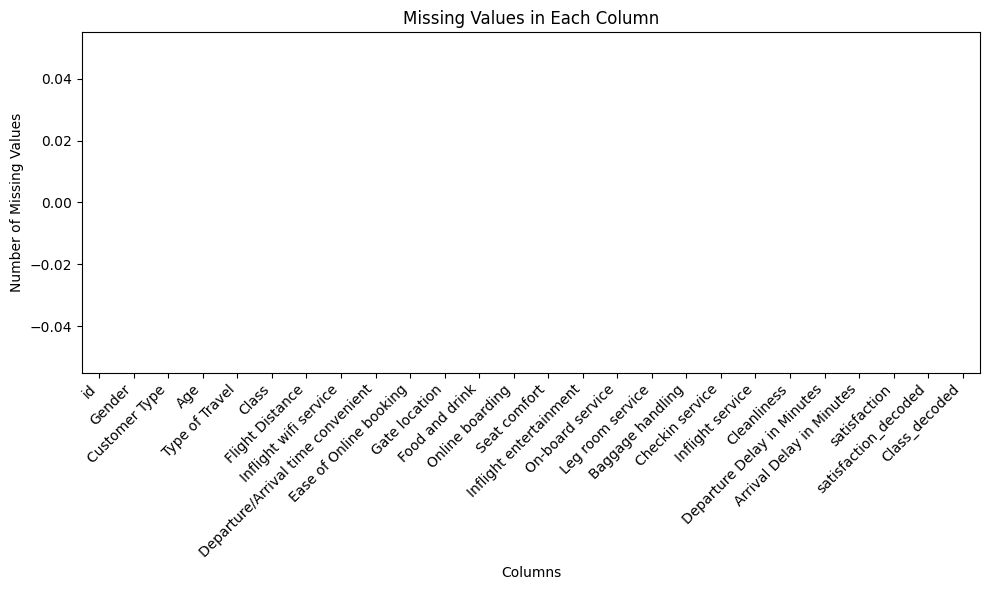

In [15]:
##Dealing with missing value

missing_values = dataset.isnull().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='blue')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values in Each Column')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This code aims to visualize the distribution of missing values across the columns in the dataset. the generated plot is empty, visually confirming the absence of any missing values in the dataset.


In [16]:
## outliers analysis

columns_with_outliers = [
    'Gender', 'Customer Type', 'Age', 'Type of Travel',
    'Class', 'Flight Distance', 'Inflight wifi service',
    'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
    'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service' , 'Inflight service', 'Cleanliness' , 
    'Departure Delay in Minutes' , 'Arrival Delay in Minutes', 'satisfaction'
]

# Calculate the mean for each column
mean_values = dfp[columns_with_outliers].mean(numeric_only=True)

# Calculate the absolute differences from the mean for each column
differences_from_mean = abs(dfp[columns_with_outliers] - mean_values)

# Find the index of the row with the largest difference from the mean across all columns
max_difference_index = differences_from_mean.sum(axis=1).idxmax()

# Remove the row with the largest difference from the mean
df_no_outlier = dfp.drop(max_difference_index)

# Display the original DataFrame and the DataFrame after removing the row with the largest difference from the mean
print("Original DataFrame:")
display(df)
print("\nDataFrame after removing the row with the largest difference from the mean:")
display(df_no_outlier)


<class 'KeyError'>: "['Inflight wifi service', 'Inflight service', 'Arrival Delay in Minutes'] not in index"

### Feature Selection

In [17]:
# Calculate the correlation matrix for numeric columns
numeric_columns = dfp.select_dtypes(include=np.number)
correlation_matrix = numeric_columns.corr()

# Print correlation matrix
print("Correlation Matrix:")
display(correlation_matrix)

Correlation Matrix:


,id,Gender,Customer Type,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
id,1.000000,0.000379,0.070437,-0.072437,-0.153893,0.110875,0.011737,0.064501,0.115633,0.004868,0.024767,0.088224,-0.025913,0.028266,0.028651,0.019988,0.101416,0.005503,-0.004832,-0.037761
Gender,0.000379,1.000000,0.011255,0.000970,-0.064651,0.035913,-0.004825,-0.049637,-0.031082,-0.085291,-0.028275,-0.075537,-0.086994,-0.025610,-0.001243,0.021695,-0.032203,-0.046463,-0.084061,0.052034
Customer Type,0.070437,0.011255,1.000000,-0.293329,0.050312,-0.223868,-0.163314,-0.004696,0.049674,-0.168354,-0.197691,-0.225274,-0.214580,-0.053062,-0.015559,0.002045,-0.055825,-0.177714,-0.070313,-0.258501
Type of Travel,-0.072437,0.000970,-0.293329,1.000000,0.466431,-0.314466,0.268864,-0.095618,-0.047950,-0.040376,-0.227001,-0.036000,-0.094088,-0.106481,-0.164206,-0.014950,0.069112,-0.051722,0.019965,-0.489243
Class,-0.153893,-0.064651,0.050312,0.466431,1.000000,-0.492344,0.080399,-0.127262,0.015211,-0.074308,-0.407733,-0.227774,-0.150329,-0.236419,-0.204689,-0.154998,-0.095015,-0.168844,-0.000966,-0.456566
Flight Distance,0.110875,0.035913,-0.223868,-0.314466,-0.492344,1.000000,-0.012577,0.044878,0.023482,0.108192,0.276977,0.213854,0.202973,0.168658,0.152610,0.123204,0.083696,0.153703,-0.045090,0.365799
Departure/Arrival time convenient,0.011737,-0.004825,-0.163314,0.268864,0.080399,-0.012577,1.000000,0.487839,0.460735,0.049439,0.132382,0.110459,0.060968,0.114467,-0.046266,0.098620,0.126234,0.107264,-0.058792,-0.116569
Ease of Online booking,0.064501,-0.049637,-0.004696,-0.095618,-0.127262,0.044878,0.487839,1.000000,0.455341,0.084834,0.416123,0.106729,0.110848,0.098664,0.113170,0.077011,0.005709,0.135427,0.081370,0.136049
Gate location,0.115633,-0.031082,0.049674,-0.047950,0.015211,0.023482,0.460735,0.455341,1.000000,-0.001285,0.014071,0.017660,0.001117,-0.029884,-0.006309,0.031368,-0.032666,0.017394,-0.070621,-0.028135
Food and drink,0.004868,-0.085291,-0.168354,-0.040376,-0.074308,0.108192,0.049439,0.084834,-0.001285,1.000000,0.312380,0.633088,0.631045,0.080198,0.038847,0.034401,0.063999,0.660653,0.037175,0.237898


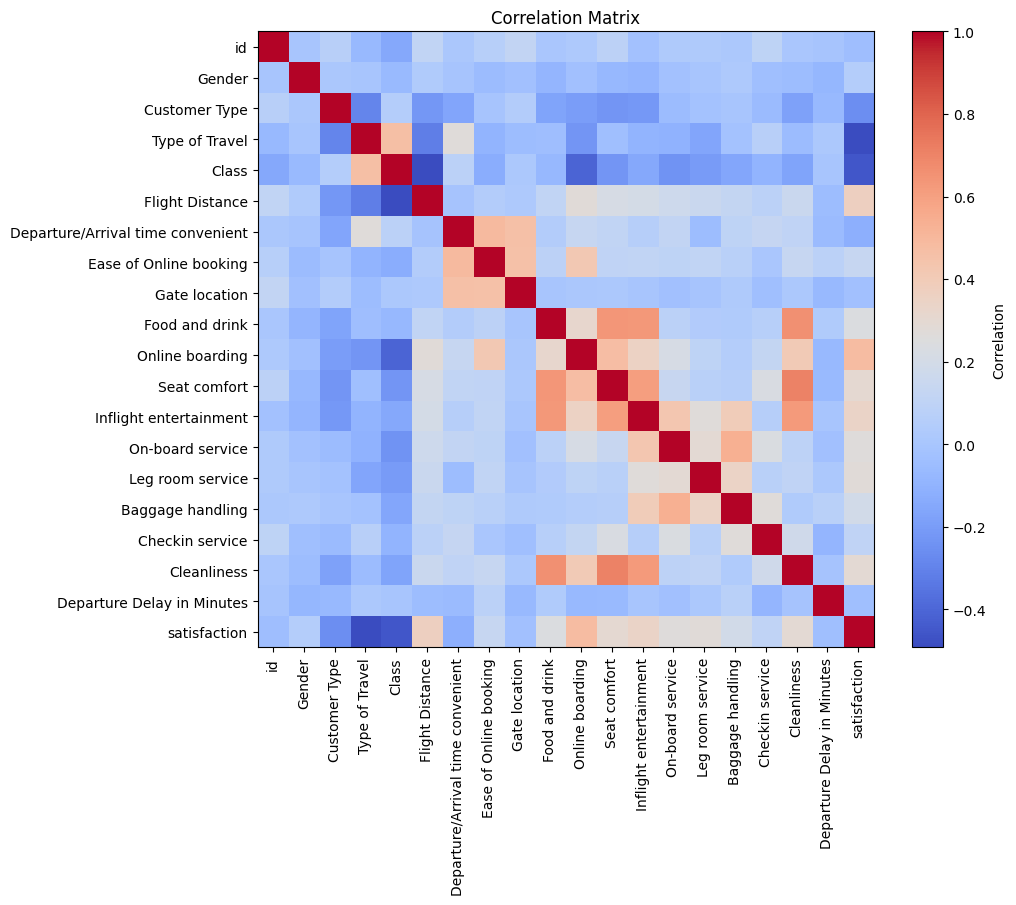

In [18]:

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation')
plt.title("Correlation Matrix")
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [19]:
columns_to_drop = ['Arrival Delay in Minutes', 'Inflight wifi service', 'Inflight service']
dfp.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

# Print updated dataset
print("\nUpdated Dataset after feature selection:")
display(dfp)


Updated Dataset after feature selection:


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,19556,0,0,50-60,0,1,0.017511,4,3,4,...,4,3,5,5,5,5,2,5,0.205761,1
1,90035,0,0,30-40,0,0,0.587764,1,3,1,...,4,5,4,4,4,4,3,5,0.000000,1
2,12360,1,1,<20,0,1,0.024262,0,2,4,...,2,2,2,4,1,3,2,2,0.000000,0
3,77959,1,0,40-50,0,0,0.696203,0,0,2,...,4,4,1,1,1,1,3,4,0.000000,1
4,36875,0,0,40-50,0,1,0.233122,3,4,3,...,1,2,2,2,2,2,4,4,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1770,1,1,<20,0,0,0.069831,0,5,2,...,5,3,3,3,5,5,3,3,0.000000,1
496,70400,0,0,40-50,0,0,0.228903,4,4,4,...,1,2,4,4,4,4,2,2,0.000000,1
497,15078,0,0,30-40,0,0,0.034177,1,1,1,...,5,1,4,4,4,4,4,1,0.000000,1
498,4927,0,0,50-60,0,0,0.198945,4,4,4,...,4,4,5,5,5,5,4,5,0.020576,1


we droped 'Arrival Delay in Minutes', 'Inflight wifi service', 'Inflight service' columns because the correlation threshold
is greater than 0.6 so we decided to remove one column from each highly correlated pair.

## Data Transformation

###  Min-Max Normalization

In [20]:
columns_to_normalize = [6, 19]  
column_data = dfp.iloc[:, columns_to_normalize]
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(column_data)
dfp.iloc[:, columns_to_normalize] = normalized_data
display(dfp)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,19556,0,0,50-60,0,1,0.017511,4,3,4,...,4,3,5,5,5,5,2,5,0.205761,1
1,90035,0,0,30-40,0,0,0.587764,1,3,1,...,4,5,4,4,4,4,3,5,0.000000,1
2,12360,1,1,<20,0,1,0.024262,0,2,4,...,2,2,2,4,1,3,2,2,0.000000,0
3,77959,1,0,40-50,0,0,0.696203,0,0,2,...,4,4,1,1,1,1,3,4,0.000000,1
4,36875,0,0,40-50,0,1,0.233122,3,4,3,...,1,2,2,2,2,2,4,4,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1770,1,1,<20,0,0,0.069831,0,5,2,...,5,3,3,3,5,5,3,3,0.000000,1
496,70400,0,0,40-50,0,0,0.228903,4,4,4,...,1,2,4,4,4,4,2,2,0.000000,1
497,15078,0,0,30-40,0,0,0.034177,1,1,1,...,5,1,4,4,4,4,4,1,0.000000,1
498,4927,0,0,50-60,0,0,0.198945,4,4,4,...,4,4,5,5,5,5,4,5,0.020576,1


The columns that are normalized are "Flight Distance" and "Departure Delay in Minutes" are chosen due to their original values have a big range and the for the result of same scale is benefical for future data mining techniques. Min-max normalization, also known as feature scaling, aims to scale the data to a fixed range, typically between 0 and 1. It ensures that all features have the same scale, which can be beneficial for algorithms that are sensitive to the scale of the features. 

### Discretization

In [21]:
dfp['Age'] = pd.to_numeric(df['Age'], errors='coerce')
bins = [0, 20, 30, 40, 50,60, 100]
labels = ['<20', '20-30', '30-40', '40-50','50-60', '>=60']
dfp['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
display(dfp)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,19556,0,0,50-60,0,1,0.017511,4,3,4,...,4,3,5,5,5,5,2,5,0.205761,1
1,90035,0,0,30-40,0,0,0.587764,1,3,1,...,4,5,4,4,4,4,3,5,0.000000,1
2,12360,1,1,<20,0,1,0.024262,0,2,4,...,2,2,2,4,1,3,2,2,0.000000,0
3,77959,1,0,40-50,0,0,0.696203,0,0,2,...,4,4,1,1,1,1,3,4,0.000000,1
4,36875,0,0,40-50,0,1,0.233122,3,4,3,...,1,2,2,2,2,2,4,4,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1770,1,1,<20,0,0,0.069831,0,5,2,...,5,3,3,3,5,5,3,3,0.000000,1
496,70400,0,0,40-50,0,0,0.228903,4,4,4,...,1,2,4,4,4,4,2,2,0.000000,1
497,15078,0,0,30-40,0,0,0.034177,1,1,1,...,5,1,4,4,4,4,4,1,0.000000,1
498,4927,0,0,50-60,0,0,0.198945,4,4,4,...,4,4,5,5,5,5,4,5,0.020576,1


Discretization is the process of converting continuous data into categorical or discrete intervals. By discretizing the age column, the dataset becomes more manageable and interpretable, allowing for easier analysis and visualization. Discretizing the age column enhances the robustness and interpretability of the data analysis process.since the data for column "Age "is evenly distributed across a wide range, more bins was used ('<20', '20-30', '30-40', '40-50','50-60', '>=60')to capture the variation and few bins may oversimplify the data.

### Data Comparison before & After pre-processing:

In [22]:
##Data before preprocessing
display(df)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,satisfaction_decoded,Class_decoded
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,2,5,5,50,44,satisfied,1,1
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,3,4,5,0,0,satisfied,1,0
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,1,3,2,2,2,0,0,neutral or dissatisfied,0,1
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,3,1,4,0,6,satisfied,1,0
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,4,2,4,0,20,satisfied,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1770,Male,disloyal Customer,20,Business travel,Business,408,5,0,5,...,5,5,3,4,3,0,0,satisfied,1,0
496,70400,Female,Loyal Customer,44,Business travel,Business,1162,4,4,4,...,4,4,2,4,2,0,4,satisfied,1,0
497,15078,Female,Loyal Customer,33,Business travel,Business,239,1,1,1,...,4,4,4,4,1,0,0,satisfied,1,0
498,4927,Female,Loyal Customer,60,Business travel,Business,1020,4,4,4,...,5,5,4,5,5,5,0,satisfied,1,0


In [24]:
##Lets take a look at our dataset after preprocessing and upload in file Dataset
dfp.to_csv("../Dataset/Processed_dataset.csv", index=False, mode='w')
display(dfp)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Departure Delay in Minutes,satisfaction
0,19556,0,0,50-60,0,1,0.017511,4,3,4,...,4,3,5,5,5,5,2,5,0.205761,1
1,90035,0,0,30-40,0,0,0.587764,1,3,1,...,4,5,4,4,4,4,3,5,0.000000,1
2,12360,1,1,<20,0,1,0.024262,0,2,4,...,2,2,2,4,1,3,2,2,0.000000,0
3,77959,1,0,40-50,0,0,0.696203,0,0,2,...,4,4,1,1,1,1,3,4,0.000000,1
4,36875,0,0,40-50,0,1,0.233122,3,4,3,...,1,2,2,2,2,2,4,4,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1770,1,1,<20,0,0,0.069831,0,5,2,...,5,3,3,3,5,5,3,3,0.000000,1
496,70400,0,0,40-50,0,0,0.228903,4,4,4,...,1,2,4,4,4,4,2,2,0.000000,1
497,15078,0,0,30-40,0,0,0.034177,1,1,1,...,5,1,4,4,4,4,4,1,0.000000,1
498,4927,0,0,50-60,0,0,0.198945,4,4,4,...,4,4,5,5,5,5,4,5,0.020576,1


## Conclusion

After comprehensive preprocessing steps including feature selection, outlier analysis, encoding, discretization, and normalization, now the dataset comprises 500 rows and 21 columns. The columns include 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Check-in service', 'Cleanliness', 'Departure Delay in Minutes', and 'satisfaction'. The 'satisfaction' column serves as the target variable for subsequent analysis tasks. The distribution of classes in the 'satisfaction' column is illustrated in the pie chart below, indicating 50% satisfied and 50% nuetral or dissatisfied customers.A balanced dataset ensures that the model is not biased towards predicting one class over another, leading to more reliable results.


### The percentage of classes after preprocessing:

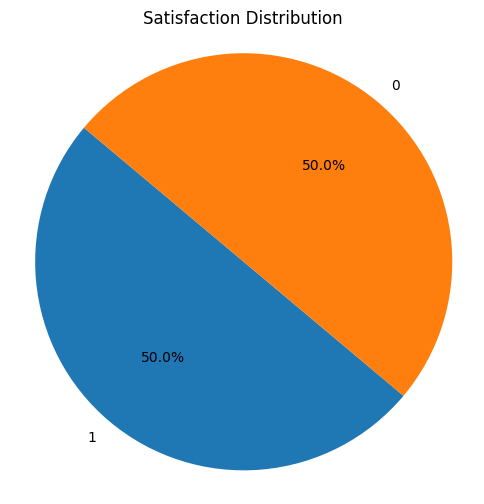

In [25]:
import matplotlib.pyplot as plt

# Assuming 'satisfaction' is the column name in your DataFrame 'dfp'

# Count the occurrences of each value in the 'satisfaction' column
satisfaction_counts = dfp['satisfaction'].value_counts()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Satisfaction Distribution')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [26]:
# Calculate the frequency of each class
class_counts = dfp['satisfaction'].value_counts()

# Convert frequencies to percentages
class_percentages = class_counts / len(dfp) * 100

print(class_percentages)

1    50.0
0    50.0
Name: satisfaction, dtype: float64
